<a href="https://colab.research.google.com/github/GreatLearningAIML1/bangalore-aug19-batch-suneethasomesula/blob/master/DL_HyperparameterTuning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activation function evaluation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU

from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [2]:
# https://corochann.com/mnist-dataset-introduction-1138.html  Introdcution to MNIST dataset


(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10
x_train = x_train.reshape(60000, 784)    # 784 = 28 X 28 the size of each image. There are 60000 images for training
x_test = x_test.reshape(10000, 784)      # Images are flattended out into a vector of 784 elements
x_train = x_train.astype('float32')      # Change the data type to float from integer (0 - 255)
x_test = x_test.astype('float32')
x_train /= 255                           # Scale the data between 0 and 1
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)   # Converting the target into categorical which is stored as numeric
y_test = keras.utils.to_categorical(y_test, num_classes)     # Keras converst these into 1-hot coded vectors as these are lables


print ('Train size:', x_train.shape[0])
print ('Test size:', x_test.shape[0])

11493376/11490434 [==============================] - 1s 0us/step
Train size: 60000
Test size: 10000


In [3]:
model = Sequential()
model.add(Dense(784, activation='relu', input_shape=(784,)))   #First hidden layer of 784  neurons, each neuron takes input 
                                                               # vector of size 784



model.add(Dense(num_classes, activation='softmax'))            # Adding a softmax layer for output which contains as many 
                                                               # neurons as the number of classes (10) which is also the 
                                                               # the shape of each output vector ( one hot coded)

                                                               # output layer also uses softmax. This normalizes the values 
                                                               # from the ten output nodes such that: 
                                                               #        all the values are between 0 and 1, and
                                                               #        the sum of all ten values is 1.  
                                                               # prediction is the lable of the node that gets highest fraction, is 
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())







dense_1 (None, 784) ==> (None, 784)
dense_2 (None, 784) ==> (None, 10)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None


model accuracy : 0.9782


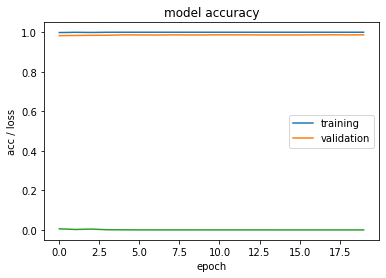

In [7]:
batch_size = 256
epochs = 20

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
loss,acc  = model.evaluate(x_test, y_test, verbose=False)
print("model accuracy :" , accuracy)
#print("validation accuracy : ", val_acc)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('acc / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

[0.9826666661898296, 0.9836666668256124, 0.9844999995231628, 0.9848333328564962, 0.9866666661898295, 0.9863333328564962, 0.9858333328564962, 0.9866666661898295, 0.9863333328564962, 0.9863333328564962, 0.9869999995231629, 0.9866666661898295, 0.9866666661898295, 0.9861666661898295, 0.9864999995231628, 0.9863333328564962, 0.9866666661898295, 0.9871666661898295, 0.9864999995231628, 0.9868333328564962]
[0.9984074074250681, 0.9996296296296296, 0.9989444444444444, 0.9998888888888889, 0.9999444444444444, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


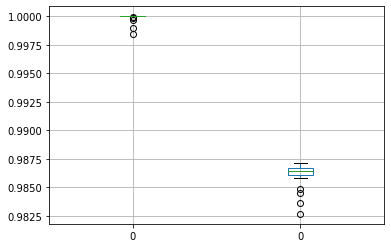

In [8]:
print(history.history['val_acc'])

print(history.history['acc'])

ta = pd.DataFrame(history.history['acc'])
va = pd.DataFrame(history.history['val_acc'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()


In [0]:
# With simple two layer NN, got an accuracy of 98%+ 
# But training and validation scores are in different ranges ... looks like overfitting case
# The accuracy is reached quite early in the epochs within first 5



# Number of hidden layers

In [0]:
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='relu', input_shape=(784,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'relu'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

def evaluate(model, batch_size=batch_size, epochs=epochs):
    model.summary()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss,accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    print("Model accuracy : ", acc)
 
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.plot(history.history['loss'])
    plt.title('model accuracy')
    plt.ylabel('acc / loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_4 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                7850      
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.9844


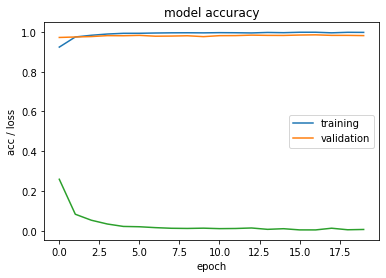

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_7 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_8 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                7850      
Total params: 1,854,170
Trainable params: 1,854,170
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.9844


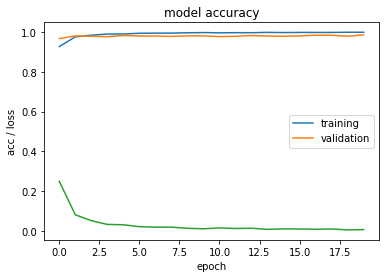

In [26]:
for layers in range(2,4):
    model = create_dense([784] * layers)
    evaluate(model)

[0.9826666661898296, 0.9836666668256124, 0.9844999995231628, 0.9848333328564962, 0.9866666661898295, 0.9863333328564962, 0.9858333328564962, 0.9866666661898295, 0.9863333328564962, 0.9863333328564962, 0.9869999995231629, 0.9866666661898295, 0.9866666661898295, 0.9861666661898295, 0.9864999995231628, 0.9863333328564962, 0.9866666661898295, 0.9871666661898295, 0.9864999995231628, 0.9868333328564962]
[0.9984074074250681, 0.9996296296296296, 0.9989444444444444, 0.9998888888888889, 0.9999444444444444, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


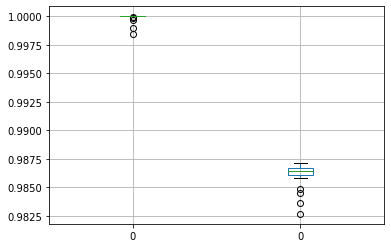

In [28]:
print(history.history['val_acc'])

print(history.history['acc'])

ta = pd.DataFrame(history.history['acc'])
va = pd.DataFrame(history.history['val_acc'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

## Observations about number of layers

1. With one hidden layer of 784 neurons and one ouput layer of 10 the validation score is 98% rounded
2. Increasing the hidden layer by one with same number of neurons shows the model is becoming wavy and overfit. Training accuracy is close to 1 while validation accuracy remains at 98% rounded
3. Increasing the hidden layer by one more makes the situation even worse
4. Returns are not enough to justify the number of parameters to learn
5. Freeze number of hiddden layers to 1




# Reduce number of neurons to 256 with only one hidden layer 

In [29]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))   
model.add(Dense(num_classes, activation='softmax'))             
 
for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())


dense_10 (None, 784) ==> (None, 256)
dense_11 (None, 256) ==> (None, 10)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


model accuracy : 0.981


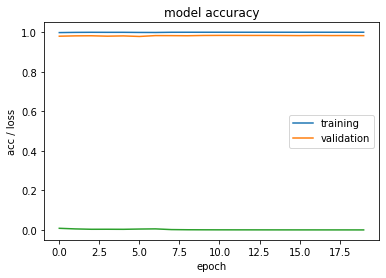

In [31]:
batch_size = 256
epochs = 20

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
loss,accuracy  = model.evaluate(x_test, y_test, verbose=False)
print("model accuracy :" , accuracy)
#print("validation accuracy : ", val_acc)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('acc / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

[0.9799999996821086, 0.9816666668256124, 0.9821666668256124, 0.9801666668256124, 0.9815000001589457, 0.9786666668256124, 0.9830000001589457, 0.9828333334922791, 0.982333333492279, 0.9836666668256124, 0.9840000001589457, 0.9840000001589457, 0.9838333334922791, 0.9838333334922791, 0.9835000001589457, 0.9830000001589457, 0.9836666668256124, 0.9831666668256124, 0.983333333492279, 0.9828333334922791]
[0.9982222222398829, 0.9992962963139569, 0.9997592592592592, 0.9995555555555555, 0.9996481481481482, 0.9990185185361792, 0.9988703703703704, 0.9998518518518519, 0.9999629629629629, 0.9999814814814815, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


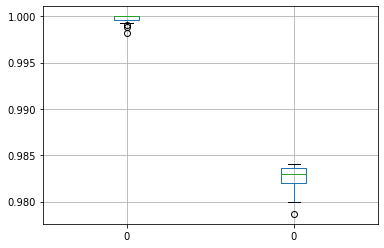

In [34]:
print(history.history['val_acc'])

print(history.history['acc'])

ta = pd.DataFrame(history.history['acc'])
va = pd.DataFrame(history.history['val_acc'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

## With 256 neurons and one hidden layer

1. we are getting similar results in validation as with 784 neurons. 
2. The degree of overfit (between training and validation) is also reduced as is evident from training box plot

3. With 128 neruons the validation accuracy drops to 97% rounded and the degree of overfit reduces further
4. Futher reduction of neurons degrades the peformance both in training and validation


## Impact of batch size

In [0]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))   
model.add(Dense(num_classes, activation='softmax'))              
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())


In [0]:
batch_size = 256    
epochs = 20
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 )
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
#                    validation_data=(x_test, y_test), callbacks = [es])

score = model.evaluate(x_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


In [0]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

## Observations on batch size

1. With smaller batch size the model becomes unstable in validation (as is evident from the accuracy chart)
2. Within the given 5 epochs the model becomes overfit (as is evident from the boxplot)
3. The validation accuracy reduces 

# Increase the Epochs

In [35]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))   
model.add(Dense(num_classes, activation='softmax'))              
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())


dense_12 (None, 784) ==> (None, 256)
dense_13 (None, 256) ==> (None, 10)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
batch_size = 256    
epochs = 50
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 )
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
#                    validation_data=(x_test, y_test), callbacks = [es])

score = model.evaluate(x_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))




Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.3787 - acc: 0.8967 - val_loss: 0.1979 - val_acc: 0.9438
Epoch 2/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.1713 - acc: 0.9515 - val_loss: 0.1394 - val_acc: 0.9586
Epoch 3/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.1235 - acc: 0.9652 - val_loss: 0.1110 - val_acc: 0.9670
Epoch 4/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.0946 - acc: 0.9732 - val_loss: 0.0995 - val_acc: 0.9702
Epoch 5/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.0747 - acc: 0.9786 - val_loss: 0.0870 - val_acc: 0.9734
Epoch 6/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.0615 - acc: 0.9832 - val_loss: 0.0795 - val_acc: 0.9769
Epoch 7/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.0507 - acc: 0.9858 - val_loss: 0.0762 - val_acc

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [0]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

## Observations on Epochs

1. Without early stopping, epochs leads to clear overfitting
2. Increasing Epochs is not useful. The Model becomes severly overfit
3. With smaller batch size, looks like it is a case of curse of dimensionality.... 
4. large batch size of 30,000 the model stabilizes, avoids overfitting but the score is marginally reduced in validation. This shows that too many epochs with small batch size is a waste. 

## Overall observation on layers, number of neurons, batch size and epoch
1. Keep the model simple in terms of number of layers and number of neurons. This will reduce time to train, less computation
   needs
    
2. Keep batch size on the larger side. It stabilizes the mode and gives more reliable estimates. If the entire data and fit in
then do not use batch size 

3. Too many epochs is not helpful. It leads to waste of time and resources and overfit models Constrain epochs usining early 
stopping.

4. use more epochs if the batch size is large. With smaller batch size, the model tends to overfit in first few epochs... the
situation become worse with more epochs


# Activation function selection

In [0]:
batch_size = 256
epochs = 20

for activation in [None, 'sigmoid', 'tanh', 'relu']:
    model = Sequential()
    model.add(Dense(256, activation=activation, input_shape=(784,)))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')
    
    plt.plot(history.history['val_accuracy'])

    
    
    
    
    
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['None', 'sigmoid', 'tanh', 'relu'], loc='upper left')

## Observations about choice of activation  functions

1. The blue line is for a linear function and surprisingly it is giving 91% + accuracy!
2. However, all the other standard activations ReLU, tanh, Sigmoid are performing relatively much better
3. All converge to same 98% +- accuracy score with increase in epoch (upto 15)
4. Any further increase in epochs may not help as all of them stop increasing beyond 
5. Sigmoid is the slowest learner followed by tanh while ReLU seems to learn fast....

# Learning Rate Optimization 

In [0]:
from keras import optimizers

def create_model():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(784,)))
    model.add(Dense(num_classes, activation='softmax'))  

    return model



In [0]:

def run_model(model, lr):
    batch_size = 256    
    epochs = 20
    model.summary()
    opt = keras.optimizers.Adam(learning_rate=lr) 
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    print("learning rate" , lr)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()







    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')


In [0]:
import numpy as np

for lr in np.arange(0.010, 0.015 , 0.001):    # try lr of 0.005 to 0.10 in steps of 0.01
    model = create_model()
    run_model(model , lr)


## Observations about choice of learning rate

1. Too small learning rates such as 0.00001 requires large number of epochs to learn. Both training and testing scores are low
2. Larger learning rates 0.05 for e.g. lead to unstable model in validation data and overall poor scores in training and test
3. Learning rates of 0.005 give more stable results early in the epoch. Becomes overfit with more epochs


# Gradient Descent Optimizers

In [0]:
def create_model():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(784,)))
    model.add(Dense(num_classes, activation='softmax'))  

    return model



In [0]:
from keras import optimizers

def run_model(model):
    batch_size = 256    # keep in 2^x 
    epochs = 20
    model.summary()
#   sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    sgd = optimizers.Adam(lr=0.01, decay=1e-6)
#    sgd = optimizers.rmsprop(lr=0.01, decay=1e-6)


  
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()







    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')


In [0]:
model = create_model()
run_model(model)

# Dropout based regularization



In [0]:
from keras.constraints import max_norm

def create_model():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(784,), kernel_constraint = max_norm(2)))
    model.add(Dropout(0.3) )  # 30% drop out for the first hidden layer   ----- > drop out
    model.add(Dense(num_classes, activation='softmax'))  

    return model



In [0]:
from keras import optimizers

def run_model(model):
    batch_size = 256    
    epochs = 20
    model.summary()
    opt = optimizers.Adam(lr=0.05)



  
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()







    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')


In [0]:
model = create_model()
run_model(model)

## Observations about Dropout 

1. Dropout layer on a simple model with one hidden layer seems to have an adverese impact.
2. Dropout layer is leading to unstable behavior in the model bothin training and testing



In [0]:
# Create model with two layers of 128 neurons each to see the impact of drop out

In [0]:
from keras.constraints import max_norm

def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(784,)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2) )  # drop out for the second hidden layer   ----- > drop out
    model.add(Dense(128, activation='relu',  kernel_constraint = max_norm(2) ))
    model.add(Dropout(0.2) )  # drop out for the second hidden layer   ----- > drop out
    model.add(Dense(num_classes, activation='softmax'))  

    return model



In [0]:
def run_model(model):
    batch_size = 256    
    epochs = 20
    model.summary()
    opt = optimizers.Adam(lr=0.005)
  
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')


In [0]:
model = create_model()
run_model(model)

## Observation on Dropout layer with multiple layers

1. Dropout layer in itself did not help. Neither did the Kernel_constraint. These parameters are probably more useful in deep
neural network
2. Learning rate value of .005 got some decent results. Here too, in the initial epochs the model is unstable and starts 
overfitting with increasing epochs
3. 

4. To prevent the model from becoming overfit, split the 256 neurons into two layers of 128 with drop layer

# Weight Initialization 


In [0]:
from keras.initializers import he_normal

def create_model():
    model = Sequential()
    model.add(Dense(88, activation='relu', input_shape=(784,), kernel_initializer = he_normal(seed=None)))
    model.add(Dropout(0.1))  # drop out for the first hidden layer   ----- > drop out
    model.add(Dense(72, activation='relu', kernel_initializer = he_normal(seed=None)))
    model.add(Dropout(0.2) )  # drop out for the second hidden layer   ----- > drop out
    model.add(Dense(num_classes, activation='softmax'))  

    return model




In [0]:
def run_model(model):
    batch_size = 30000    
    epochs = 20
    model.summary()
    opt = optimizers.Adam(lr=0.005)
  
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')


In [0]:
model = create_model()
run_model(model)

In [0]:
ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

In [0]:
# Observations of including kernel initialier of He_norm and other parameters
1. Frustrating! the model was looking very unstable with all the combinations of parameter values
2. raised the batch size to 30,000 and got rid of the instability
3. Avg accuracy of 98% in validation

# Grid Search

In [0]:
import numpy as np
from keras.constraints import maxnorm
from keras import backend as keras_backend
from keras.utils import np_utils

from keras.models import load_model

from sklearn.model_selection import GridSearchCV, cross_val_score

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier


from sklearn.model_selection import StratifiedKFold

random_seed = 64
np.random.seed(random_seed)



In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10
x_train = x_train.reshape(60000, 784)    # 784 = 28 X 28 the size of each image. There are 60000 images for training
x_test = x_test.reshape(10000, 784)      # Images are flattended out into a vector of 784 elements
x_train = keras_backend.cast_to_floatx(x_train)      # Change the data type to float from integer (0 - 255)
x_test = keras_backend.cast_to_floatx(x_test)
x_train /= 255.0                           # Scale the data between 0 and 1
x_test /= 255.0

original_y_train = y_train
original_y_test = y_test

y_train = keras.utils.to_categorical(y_train, num_classes)   # Converting the target into categorical which is stored as numeric
y_test = keras.utils.to_categorical(y_test, num_classes)     # Keras converst these into 1-hot coded vectors as these are lables


print ('Train size:', x_train.shape[0])
print ('Test size:', x_test.shape[0])



In [0]:
# Function to create model, required for KerasClassifier
def create_model(number_of_layers=2, neurons_per_layer = 32, dropout_percent = 0.2, optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(neurons_per_layer, activation='relu', input_shape=(784,)))
    
    for i in range(number_of_layers-1):
        model.add(Dense(neurons_per_layer, activation='relu', kernel_constraint = maxnorm(3)))
        model.add(Dropout(dropout_percent))
        
    # Add the output layer with softmax
    model.add(Dense(num_classes, kernel_initializer = 'normal', activation='softmax'))  
        
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
   
    return model

In [0]:
# create model
kc_model = KerasClassifier(build_fn=create_model,number_of_layers=2, neurons_per_layer = 256, optimizer = 'adam', epochs=20, batch_size=30000, verbose=0) # Wrapper for scikitlearn API, provides 
                                                                                    # facility to get scores 


In [0]:
kfold = StratifiedKFold(n_splits = 2, shuffle=True, random_state = 64)

In [0]:
results = cross_val_score(kc_model, x_train, original_y_train, cv=kfold, verbose=1)

In [0]:
print('results = {}\nresults.mean = {}'.format(results, results.mean()))

In [0]:
# define the grid search parameters

param_grid = dict(number_of_layers = [2 , 3],
                 neurons_per_layer = [32 , 128],
                 optimizer = ['adam', 'sgd'])


In [0]:

gridsearcher = GridSearchCV(estimator=kc_model, param_grid=param_grid, n_jobs=1)
grid_result = gridsearcher.fit(x_train, original_y_train)

In [0]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [0]:
#learn_rate = [0.001, 0.002]
#momentum = [0.0, 0.1, 0.3]
#optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
#init_mode = ['uniform', 'lecun_uniform', 'normal', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
# activation = ['relu', 'tanh', 'sigmoid']
# dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
#neurons = [10, 12, 13, 14, 15]